In [1]:
# Pandas
from config import DB_USER, DB_PASS, DB_ENDPOINT
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# SQL Alchemy
from sqlalchemy import create_engine

In [2]:
 # Create Engine
engine = create_engine(f"postgresql://{DB_USER}:{DB_PASS}@{DB_ENDPOINT}")
conn = engine.connect()

In [3]:
# Query All Records in the the Database
data = pd.read_sql("SELECT * FROM historical", conn, index_col="index")
data.head()

,crypto,time,open,high,low,close,volume,trade
index,,,,,,,,
0,bitcoin_usdt,1.511914e+09,9896.79000000,11300.03000000,8520.00000000,9687.88000000,13352.53871500,8662.63236200
1,bitcoin_usdt,1.512000e+09,9687.88000000,10900.00000000,8850.80000000,9838.96000000,9389.57432900,5360.66024200
2,bitcoin_usdt,1.512086e+09,9837.00000000,10898.00000000,9380.00000000,10782.99000000,6134.92363300,3269.86858800
3,bitcoin_usdt,1.512173e+09,10775.04000000,11190.00000000,10620.00000000,10890.01000000,4765.43975700,2390.19427500
4,bitcoin_usdt,1.512259e+09,10902.69000000,11825.00000000,10500.00000000,11165.41000000,5346.63652400,2574.24618700


In [4]:
ethereum_df = data[data["crypto"] == "ethereum_usdt"]
ethereum_df = ethereum_df.reset_index(drop=True)
ethereum_df.head()

,crypto,time,open,high,low,close,volume,trade
0,ethereum_usdt,1.511914e+09,466.17000000,515.00000000,385.00000000,421.70000000,51313.49571000,23825.39377000
1,ethereum_usdt,1.512000e+09,421.92000000,460.00000000,387.01000000,427.43000000,45184.22265000,24018.42012000
2,ethereum_usdt,1.512086e+09,428.05000000,465.97000000,413.74000000,457.51000000,33072.21995000,19043.24922000
3,ethereum_usdt,1.512173e+09,457.53000000,471.91000000,445.00000000,457.63000000,25796.14000000,12336.59141000
4,ethereum_usdt,1.512259e+09,457.31000000,485.90000000,440.11000000,460.30000000,24490.05997000,12239.10293000


In [5]:
# drop the crypto column which is just a name
ethereum_df = ethereum_df.drop("crypto", axis=1)
ethereum_df.head()

,time,open,high,low,close,volume,trade
0,1.511914e+09,466.17000000,515.00000000,385.00000000,421.70000000,51313.49571000,23825.39377000
1,1.512000e+09,421.92000000,460.00000000,387.01000000,427.43000000,45184.22265000,24018.42012000
2,1.512086e+09,428.05000000,465.97000000,413.74000000,457.51000000,33072.21995000,19043.24922000
3,1.512173e+09,457.53000000,471.91000000,445.00000000,457.63000000,25796.14000000,12336.59141000
4,1.512259e+09,457.31000000,485.90000000,440.11000000,460.30000000,24490.05997000,12239.10293000


In [6]:
ethereum_df["time"] = pd.to_datetime(ethereum_df['time'], unit="s")
ethereum_df.head()

,time,open,high,low,close,volume,trade
0,2017-11-29,466.17000000,515.00000000,385.00000000,421.70000000,51313.49571000,23825.39377000
1,2017-11-30,421.92000000,460.00000000,387.01000000,427.43000000,45184.22265000,24018.42012000
2,2017-12-01,428.05000000,465.97000000,413.74000000,457.51000000,33072.21995000,19043.24922000
3,2017-12-02,457.53000000,471.91000000,445.00000000,457.63000000,25796.14000000,12336.59141000
4,2017-12-03,457.31000000,485.90000000,440.11000000,460.30000000,24490.05997000,12239.10293000


In [7]:
ethereum_df = ethereum_df.set_index("time")
ethereum_df.head()

,open,high,low,close,volume,trade
time,,,,,,
2017-11-29,466.17000000,515.00000000,385.00000000,421.70000000,51313.49571000,23825.39377000
2017-11-30,421.92000000,460.00000000,387.01000000,427.43000000,45184.22265000,24018.42012000
2017-12-01,428.05000000,465.97000000,413.74000000,457.51000000,33072.21995000,19043.24922000
2017-12-02,457.53000000,471.91000000,445.00000000,457.63000000,25796.14000000,12336.59141000
2017-12-03,457.31000000,485.90000000,440.11000000,460.30000000,24490.05997000,12239.10293000


In [8]:
ethereum_df.dtypes

open      object
high      object
low       object
close     object
volume    object
trade     object
dtype: object

In [9]:
# convert to numerical
ethereum_df = ethereum_df.astype({"open": float, "high": float, "low":float, "close": float, "volume": float, "trade": float})
ethereum_df.dtypes

open      float64
high      float64
low       float64
close     float64
volume    float64
trade     float64
dtype: object

In [10]:
# set the close price 14 day prior as another feature
projection = 30
ethereum_df["close(t-14)"] = ethereum_df["close"].shift(projection).astype(float)
ethereum_df.tail(15)

,open,high,low,close,volume,trade,close(t-14)
time,,,,,,,
2021-11-15,4626.50,4772.01,4540.00,4563.78,375421.6601,193844.8631,3829.96
2021-11-16,4563.77,4563.77,4103.00,4209.76,735857.0630,354749.4963,3846.85
2021-11-17,4209.59,4299.91,4063.48,4287.80,472852.1842,230168.3863,3744.96
2021-11-18,4288.07,4344.81,3956.44,3996.90,576945.1837,271503.5573,3877.03
2021-11-19,3996.90,4308.97,3973.01,4294.76,420045.0897,220791.4006,4161.15
2021-11-20,4294.75,4435.88,4199.86,4412.17,365584.5780,184875.7626,4052.99
2021-11-21,4412.17,4451.00,4242.41,4258.31,340206.3203,163875.6246,3972.20
2021-11-22,4259.70,4320.00,4022.74,4085.97,518501.3338,252693.2206,4167.12
2021-11-23,4086.28,4385.59,4059.62,4339.44,502811.7902,257182.2577,4082.33


In [11]:
# insert column with the difference between 14 days ago and today
ethereum_df["14 day diff"] = ethereum_df["close"] - ethereum_df["close(t-14)"]
ethereum_df.head()

,open,high,low,close,volume,trade,close(t-14),14 day diff
time,,,,,,,,
2017-11-29,466.17,515.00,385.00,421.70,51313.49571,23825.39377,NaN,NaN
2017-11-30,421.92,460.00,387.01,427.43,45184.22265,24018.42012,NaN,NaN
2017-12-01,428.05,465.97,413.74,457.51,33072.21995,19043.24922,NaN,NaN
2017-12-02,457.53,471.91,445.00,457.63,25796.14000,12336.59141,NaN,NaN
2017-12-03,457.31,485.90,440.11,460.30,24490.05997,12239.10293,NaN,NaN


In [12]:
ethereum_df.isnull().sum()

open            0
high            0
low             0
close           0
volume          0
trade           0
close(t-14)    30
14 day diff    30
dtype: int64

In [13]:
#remove nan rows
ethereum_df= ethereum_df.dropna()
ethereum_df.isnull().sum()

open           0
high           0
low            0
close          0
volume         0
trade          0
close(t-14)    0
14 day diff    0
dtype: int64

In [14]:
# remove the last 14 rows from the data (days we want to predict)
X = ethereum_df[:-projection]

In [15]:
# Set our X features data by dropping our target
X = X.drop("close", axis=1)
X

,open,high,low,volume,trade,close(t-14),14 day diff
time,,,,,,,
2017-12-29,709.50,757.87,703.00,64028.12647,31777.71602,421.70,312.29
2017-12-30,732.90,735.00,635.82,89879.99994,41572.44573,427.43,253.63
2017-12-31,680.01,740.00,672.86,62628.24458,32109.79685,457.51,276.47
2018-01-01,733.01,763.55,716.80,53909.25885,27993.21701,457.63,297.36
2018-01-02,754.99,899.50,749.06,113257.78355,59298.38305,460.30,394.98
...,...,...,...,...,...,...,...
2021-10-26,4220.36,4297.00,4090.21,414498.15990,205853.06890,3059.37,1072.15
2021-10-27,4131.52,4307.00,3909.00,704604.25000,342946.25220,2925.59,996.41
2021-10-28,3921.99,4295.00,3890.17,626378.50550,331721.67970,2804.91,1481.11


In [16]:
# remove the last 14 rows from the data (days we want to predict)
y = ethereum_df[:-projection]

In [17]:
# Set y target
y = y["close"]
y

time
2017-12-29     733.99
2017-12-30     681.06
2017-12-31     733.98
2018-01-01     754.99
2018-01-02     855.28
               ...   
2021-10-26    4131.52
2021-10-27    3922.00
2021-10-28    4286.02
2021-10-29    4418.89
2021-10-30    4322.68
Name: close, Length: 1402, dtype: float64

LR: 1.000000 (0.000000)
Lasso: 0.912024 (0.051270)
Ridge: 0.367339 (0.543961)
RF: 0.401316 (0.818702)
XGBOOST: 0.396222 (0.822930)
NN: 0.992443 (0.003207)
KNN: -6.948348 (6.517311)
SVR: -11.271765 (13.206510)


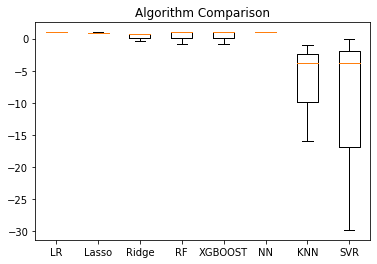

In [18]:
import warnings
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import cross_val_score


warnings.simplefilter("ignore")

models = []
models.append(('LR', LinearRegression(normalize=True)))
models.append(('Lasso', Lasso(normalize=True))) 
models.append(('Ridge', Ridge(normalize=True))) 
models.append(('RF', RandomForestRegressor(n_estimators = 200)))
models.append(('XGBOOST', XGBRegressor(n_estimators = 200, verbosity = 0)))
models.append(('NN', MLPRegressor(solver = 'lbfgs')))
models.append(('KNN', KNeighborsRegressor()))
models.append(('SVR', SVR(gamma='auto')))

# Evaluate each model in turn
results = []
names = []
for name, model in models:
    tscv = TimeSeriesSplit(n_splits=3)
    cv_results = cross_val_score(model, X, y, cv=tscv, scoring='r2')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
    #print("TRAIN:", train_index, "TEST:", test_index)
    
    
# Compare Algorithms
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

In [19]:
# We need to set our training and testing data.
# We want all of the data except the last 30 days to train on, and we will test on the last 30 days, 


#remove last 30 days we want to keep as test data and drop our label which is the prediction column
X_train = ethereum_df[:-projection].drop("close",axis=1)
print(X_train)


y_train = ethereum_df[:-projection]
y_train = y_train["close"]
y_train

               open     high      low        volume         trade  \
time                                                                
2017-12-29   709.50   757.87   703.00   64028.12647   31777.71602   
2017-12-30   732.90   735.00   635.82   89879.99994   41572.44573   
2017-12-31   680.01   740.00   672.86   62628.24458   32109.79685   
2018-01-01   733.01   763.55   716.80   53909.25885   27993.21701   
2018-01-02   754.99   899.50   749.06  113257.78355   59298.38305   
...             ...      ...      ...           ...           ...   
2021-10-26  4220.36  4297.00  4090.21  414498.15990  205853.06890   
2021-10-27  4131.52  4307.00  3909.00  704604.25000  342946.25220   
2021-10-28  3921.99  4295.00  3890.17  626378.50550  331721.67970   
2021-10-29  4286.01  4460.47  4265.97  559231.07691  299827.57771   
2021-10-30  4418.89  4434.06  4232.20  340223.06900  164985.54250   

            close(t-14)  14 day diff  
time                                  
2017-12-29       421.70 

time
2017-12-29     733.99
2017-12-30     681.06
2017-12-31     733.98
2018-01-01     754.99
2018-01-02     855.28
               ...   
2021-10-26    4131.52
2021-10-27    3922.00
2021-10-28    4286.02
2021-10-29    4418.89
2021-10-30    4322.68
Name: close, Length: 1402, dtype: float64

In [20]:
# Our testing set will be the last 30 days of the data.
# Just the last 30 days
X_test = ethereum_df[-projection:].drop("close", axis=1)
print(X_test)

y_test = ethereum_df[-projection:]
y_test = y_test["close"]
y_test

               open     high      low        volume         trade  \
time                                                                
2021-10-31  4322.68  4399.14  4164.35  412856.28930  207029.19300   
2021-11-01  4287.48  4386.58  4146.30  417620.70730  208433.93650   
2021-11-02  4319.43  4599.60  4284.43  468184.79301  245450.71120   
2021-11-03  4589.68  4665.87  4455.00  448658.35125  221693.79026   
2021-11-04  4603.35  4606.65  4420.08  368218.25695  180789.48190   
2021-11-05  4532.31  4570.05  4438.80  305651.72440  152155.85650   
2021-11-06  4474.24  4530.00  4326.17  322154.09730  162175.62780   
2021-11-07  4518.00  4637.98  4502.37  243596.59520  124167.19250   
2021-11-08  4612.59  4822.97  4612.00  391102.31806  202324.49531   
2021-11-09  4807.98  4838.28  4713.89  311267.57998  147968.47588   
2021-11-10  4732.33  4868.00  4461.93  553596.99163  270065.18221   
2021-11-11  4628.68  4779.00  4576.47  303688.97650  157894.35770   
2021-11-12  4719.00  4809.71  4507

time
2021-10-31    4287.21
2021-11-01    4319.43
2021-11-02    4589.89
2021-11-03    4603.35
2021-11-04    4532.32
2021-11-05    4474.24
2021-11-06    4518.00
2021-11-07    4612.59
2021-11-08    4807.98
2021-11-09    4732.33
2021-11-10    4628.78
2021-11-11    4719.00
2021-11-12    4665.46
2021-11-13    4644.28
2021-11-14    4626.50
2021-11-15    4563.78
2021-11-16    4209.76
2021-11-17    4287.80
2021-11-18    3996.90
2021-11-19    4294.76
2021-11-20    4412.17
2021-11-21    4258.31
2021-11-22    4085.97
2021-11-23    4339.44
2021-11-24    4269.36
2021-11-25    4524.85
2021-11-26    4041.20
2021-11-27    4095.29
2021-11-28    4294.78
2021-11-29    4444.53
Name: close, dtype: float64

In [21]:
model = LinearRegression(normalize=True)

model.fit(X_train, y_train)
print("R2 Score",model.score(X_train,y_train))

R2 Score 1.0


In [22]:
predictions = model.predict(X_test)
data = pd.DataFrame()
data["actual"] = y_test
data["predictions"] = predictions
data["difference ($)"] = data["predictions"] - data["actual"]
data["difference (%)"] = data["difference ($)"] / data["actual"] *100
data

,actual,predictions,difference ($),difference (%)
time,,,,
2021-10-31,4287.21,4287.21,9.094947e-13,2.121414e-14
2021-11-01,4319.43,4319.43,9.094947e-13,2.105590e-14
2021-11-02,4589.89,4589.89,9.094947e-13,1.981517e-14
2021-11-03,4603.35,4603.35,1.818989e-12,3.951447e-14
2021-11-04,4532.32,4532.32,9.094947e-13,2.006687e-14
2021-11-05,4474.24,4474.24,9.094947e-13,2.032736e-14
2021-11-06,4518.00,4518.00,9.094947e-13,2.013047e-14
2021-11-07,4612.59,4612.59,9.094947e-13,1.971766e-14
2021-11-08,4807.98,4807.98,9.094947e-13,1.891636e-14


In [23]:
print(data["difference (%)"].mean())

3.4572166308825084e-14


In [24]:
from sklearn.metrics import mean_absolute_error
y_pred = model.predict(X_test)
mean_absolute_error(y_test, y_pred)

1.5158245029548805e-12

<AxesSubplot:xlabel='time'>

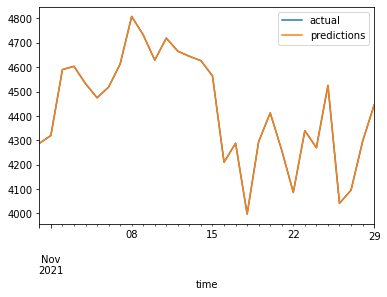

In [25]:
#plot chart
data.plot(y=["actual", "predictions"])

In [26]:
data = pd.DataFrame()
data["scores"] = model.coef_
data["features"] = X_train.columns.tolist()
data

,scores,features
0,1.437263e-15,open
1,-1.040620e-15,high
2,-5.668088e-16,low
3,-1.492472e-18,volume
4,3.157603e-18,trade
5,1.000000e+00,close(t-14)
6,1.000000e+00,14 day diff


<AxesSubplot:xlabel='features'>

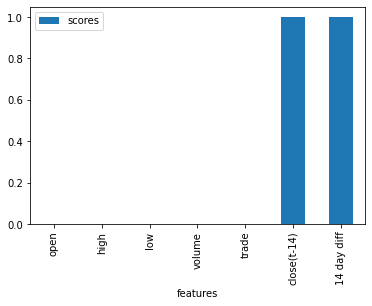

In [27]:
data.plot(kind="bar", x="features", y="scores")

In [28]:
# test for overfitting.
from sklearn.metrics import mean_absolute_error, r2_score
pred_train = model.predict(X_train)
r2_score(y_train, pred_train)

1.0

In [29]:
pred_test = model.predict(X_test)
r2_score(y_test, pred_test)

1.0

Same score on Train set and Test set. Model is not overfitting.

In [30]:
# import pickle
# pickle.dump(model, open("best_model.pkl", "wb"))

# import pickle
# loaded_model= pickle.load(open("best_model.pkl", "rb"))

# loaded_model.predict(X_test)